In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def polynomial_dataframe(feature, degree): 
    """
    Takes an array of 'feature' and a maximal 'degree', 
    and return a data frame with the first column equal to 'feature'
    and the remaining columns equal to ‘feature’ to increasing integer powers up to 'degree'
    :param feature: pandas Series
    :param degree: int >=1
    :return : a dataframe of the feature columns
    """
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [4]:
def get_train_data_and_model(df, feature, degree):
    """
    Given feature name and the degree to which the feature is powered to,
    return the training data and the model fit on the training data
    """
    poly_data = polynomial_dataframe(df[feature], degree)
    poly_features = poly_data.columns
    poly_data['price'] = df['price'] # add price to the data since it's the target
    X_train = np.array(poly_data[poly_features])
    Y_train = np.array(poly_data['price']).reshape(-1, 1)
    model = LinearRegression().fit(X_train, Y_train)
    return X_train, Y_train, model

In [5]:
model_1_X_train, model_1_Y_train, model_1 = get_train_data_and_model(sales, 'sqft_living',1)
model_1.coef_

array([[280.6235679]])

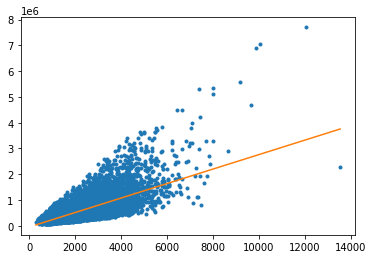

In [6]:
plt.plot(model_1_X_train, model_1_Y_train,'.', 
         model_1_X_train, model_1.predict(model_1_X_train),'-')

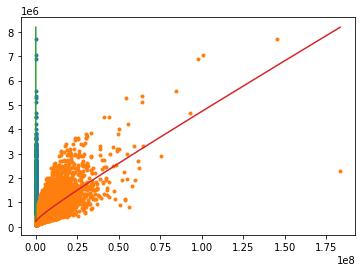

In [7]:
model_2_X_train, model_2_Y_train, model_2 = get_train_data_and_model(sales, 'sqft_living',2)
plt.plot(model_2_X_train, model_2_Y_train,'.', 
         model_2_X_train, model_2.predict(model_2_X_train),'-')

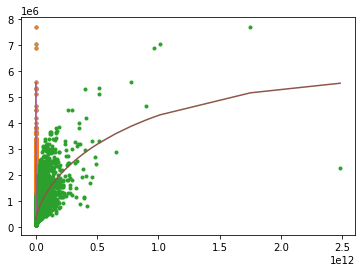

In [8]:
model_3_X_train, model_3_Y_train, model_3 = get_train_data_and_model(sales, 'sqft_living',3)
plt.plot(model_3_X_train, model_3_Y_train,'.', 
         model_3_X_train, model_3.predict(model_3_X_train),'-')

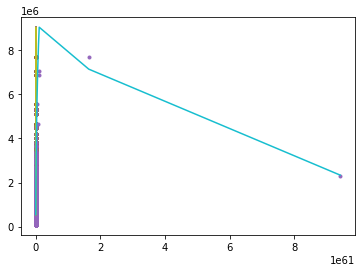

In [9]:
model_15_X_train, model_15_Y_train, model_15 = get_train_data_and_model(sales, 'sqft_living',15)
plt.plot(model_15_X_train, model_15_Y_train,'.', 
         model_15_X_train, model_15.predict(model_15_X_train),'-')

In [10]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

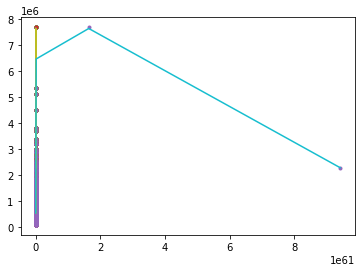

In [11]:
set_1_X_train, set_1_Y_train, set_1_model = get_train_data_and_model(set_1, 'sqft_living',15)
plt.plot(set_1_X_train, set_1_Y_train,'.', 
         set_1_X_train, set_1_model.predict(set_1_X_train),'-')

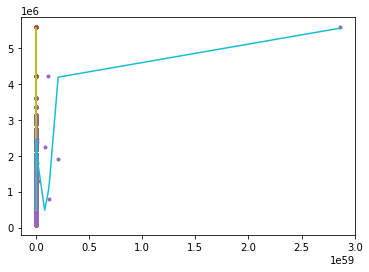

In [12]:
set_2_X_train, set_2_Y_train, set_2_model = get_train_data_and_model(set_2, 'sqft_living',15)
plt.plot(set_2_X_train, set_2_Y_train,'.', 
         set_2_X_train, set_2_model.predict(set_2_X_train),'-')

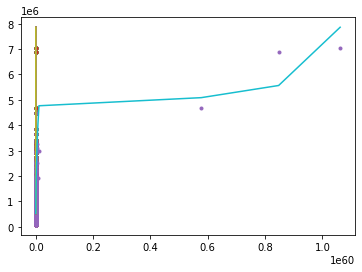

In [13]:
set_3_X_train, set_3_Y_train, set_3_model = get_train_data_and_model(set_3, 'sqft_living',15)
plt.plot(set_3_X_train, set_3_Y_train,'.', 
         set_3_X_train, set_3_model.predict(set_3_X_train),'-')

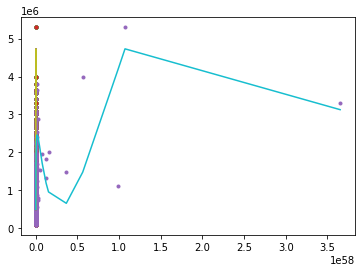

In [14]:
set_4_X_train, set_4_Y_train, set_4_model = get_train_data_and_model(set_4, 'sqft_living',15)
plt.plot(set_4_X_train, set_4_Y_train,'.', 
         set_4_X_train, set_4_model.predict(set_4_X_train),'-')

In [15]:
print("Set 1: ", set_1_model.coef_[0][-1])
print("Set 2: ", set_2_model.coef_[0][-1])
print("Set 3: ", set_3_model.coef_[0][-1])
print("Set 4: ", set_4_model.coef_[0][-1])

Set 1:  2.186411164082444e-52
Set 2:  -1.9650057176013207e-49
Set 3:  3.4313293205151916e-51
Set 4:  -6.090730609712642e-49


In [16]:
training = pd.read_csv('wk3_kc_house_train_data.csv')
validation = pd.read_csv('wk3_kc_house_valid_data.csv')
testing = pd.read_csv('wk3_kc_house_test_data.csv')

In [18]:
for p in range(1, 16):
    X_train, Y_train, model = get_train_data_and_model(training, 'sqft_living', p)
    validation_train = polynomial_dataframe(validation['sqft_living'], p)
    RSS = sum((np.array(validation['price']).reshape(-1,1) - model.predict(validation_train))**2)
    print(f"RSS at degree {p}: {RSS}")

RSS at degree 1: [6.29097886e+14]
RSS at degree 2: [6.23955063e+14]
RSS at degree 3: [6.2582028e+14]
RSS at degree 4: [6.29987336e+14]
RSS at degree 5: [6.28224827e+14]
RSS at degree 6: [5.66268534e+14]
RSS at degree 7: [1.07384509e+15]
RSS at degree 8: [7.08777614e+15]
RSS at degree 9: [4.5298598e+16]
RSS at degree 10: [2.47100347e+17]
RSS at degree 11: [1.19329901e+18]
RSS at degree 12: [4.98771707e+18]
RSS at degree 13: [7.61623002e+17]
RSS at degree 14: [2.29756093e+18]
RSS at degree 15: [6.9550381e+18]


In [19]:
X_train, Y_train, model = get_train_data_and_model(training, 'sqft_living', 6)
testing_train = polynomial_dataframe(testing['sqft_living'], 6)
RSS = sum((np.array(testing['price']).reshape(-1,1) - model.predict(testing_train))**2)
print(RSS)

[1.35225107e+14]
